In [ ]:
!pip install --upgrade tqdm
import os 
os.kill(os.getpid(), 9)

     |████████████████████████████████| 71kB 6.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [8]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# No GPU found

No GPU found


In [31]:
import sys
!{sys.executable} -m pip install tensorflow==1.15.2

You should consider upgrading via the '/Users/yeeeeehan/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# %tensorflow_version 1.x
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

1.15.2
2.3.1


Using TensorFlow backend.


In [3]:
!pwd
!ls

/Users/yeeeeehan/Desktop/FYP
FYP_report.docx                       encoder
Privacy-Preserving_notebook.ipynb     ffhq_dataset
README.md                             generated_images
__pycache__                           karras2019stylegan-ffhq-1024x1024.pkl
align_images.py                       latent_comparisons
aligned_images                        latent_generations
assets                                latent_representations
comparison                            masks
config.py                             raw_images
data                                  survey
dnnlib                                videos
encode_images.py


# 1. Image pre-processing - Aligning images



#### In this section, we will :
*   Display all raw images
*   Align and rescale images to centralise the faces

In the alignment of the faces, the images is cropped to position the face in the middle of the image for consistency throughout all images.


<img src="https://raw.githubusercontent.com/YeeeeeHan/FYP/main/assets/aligning_images.png" height="300">




Found 1 images in raw_images
['00064.png']


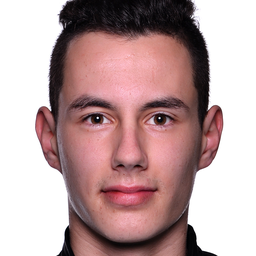

In [4]:
from PIL import Image
import os
imgs = sorted(os.listdir('raw_images'))
for index, img in enumerate(imgs):
    if img.find('.DS_Store') != -1:
        imgs.pop(index)

print("Found %d images in %s" %(len(imgs), 'raw_images'))
if len(imgs) == 0:
  print("Upload images to the \"raw_images\" folder!")
else:
  print(imgs)

for img_path in imgs:
  img = Image.open('raw_images/' + img_path)
  
  w,h = img.size
  rescale_ratio = 256 / min(w,h)
  img = img.resize((int(rescale_ratio*w),int(rescale_ratio*h)), Image.LANCZOS)
  display(img)

In [5]:
!python align_images.py raw_images aligned_images --output_size=1024

Using TensorFlow backend.
File path: aligned_images/.DS_Store.png
File already exists: False
Aligning .DS_Store ...
Getting landmarks...
raw_images/.DS_Store
An exception of type RuntimeError occurred. Arguments:
('Unknown image file format: Unable to load image in file raw_images/.DS_Store',)
File path: aligned_images/00064.png
File already exists: True


# 1.1 Displaying aligned images

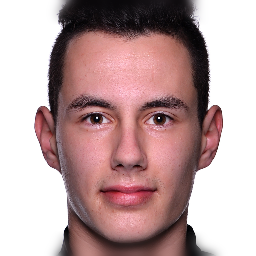

'img 0: 00064.png'



done


In [6]:
def display_folder_content(folder, res = 256):
  if folder[-1] != '/': folder += '/'
  for i, img_path in enumerate(sorted(os.listdir(folder))):
    if '.png' in img_path:
      display(Image.open(folder+img_path).resize((res,res)), 'img %d: %s' %(i, img_path))
      print('\n')
      
display_folder_content('aligned_images')
print('done')


# 2. Encoding images

In [19]:
!python encode_images.py --optimizer=lbfgs --lr=0.02 --decay_rate=0.95 --face_mask=True --iterations=4 \
 --use_lpips_loss=0 --use_discriminator_loss=0 --video_frame_rate=3 --output_video=True \
 aligned_images/ generated_images/ latent_representations/

W1216 21:55:07.763744 4755004928 module_wrapper.py:139] From /Users/yeeeeehan/Desktop/FYP/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W1216 21:55:07.764193 4755004928 module_wrapper.py:139] From /Users/yeeeeehan/Desktop/FYP/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1216 21:55:07.764328 4755004928 module_wrapper.py:139] From /Users/yeeeeehan/Desktop/FYP/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

Using TensorFlow backend.
@@@@@@@@@@@@@@@@@@@@@@   version 22   @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
W1216 21:55:07.955273 4755004928 module_wrapper.py:139] From /Users/yeeeeehan/Desktop/FYP/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1216 21:55:07.955563 4755004928 module_wrapper.py:139] From /Users/yeeeeehan/Desk

In [ ]:
 import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import os

def plot_two_images(img1,img2, img_id, filename, fs = 12):
  f, axarr = plt.subplots(1,2, figsize=(fs,fs))
  axarr[0].imshow(img1)
  axarr[0].title.set_text('original')
  axarr[1].imshow(img2)
  axarr[1].title.set_text(filename)
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.tight_layout()
  plt.savefig("comparison/"+ filename +'.png')
  plt.show()

def display_sbs(folder1, folder2, res = 256):
  if folder1[-1] != '/': folder1 += '/'
  if folder2[-1] != '/': folder2 += '/'
    
  imgs1 = sorted([f for f in os.listdir(folder1) if '.png' in f])
  imgs2 = sorted([f for f in os.listdir(folder2) if '.png' in f])
  if len(imgs1)!=len(imgs2):
    print("Found different amount of images in aligned vs raw image directories. That's not supposed to happen...")
  
  for i in range(len(imgs1)):
    filename, _ = os.path.splitext(imgs2[i])
    img1 = Image.open(folder1+imgs1[i]).resize((res,res))
    img2 = Image.open(folder2+imgs2[i]).resize((res,res))
    plot_two_images(img1,img2, i, filename)
    print("")
     
display_sbs('aligned_images/','generated_images/', res = 512)

# 3. Viewing latents

In [ ]:
def generate_images(generator, latent_vector, z = True):
    batch_size = latent_vector.shape[0]
    

    if z: #Start from z: run the full generator network
        return generator.run(latent_vector.reshape((batch_size, 512)), None, randomize_noise=False, **synthesis_kwargs)
    else: #Start from w: skip the mapping network
        return generator.components.synthesis.run(latent_vector.reshape((batch_size, 18, 512)), randomize_noise=False, **synthesis_kwargs)


In [ ]:
 import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import os
import numpy as np
import dnnlib, pickle
import dnnlib.tflib as tflib
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

with open('karras2019stylegan-ffhq-1024x1024.pkl', 'rb') as f:
    generator_network, discriminator_network, averaged_generator_network = pickle.load(f)


def plot_two_images(img1,img2, img_id, filename, fs = 12):
  f, axarr = plt.subplots(1,2, figsize=(fs,fs))
  axarr[0].imshow(img1)
  axarr[0].title.set_text('original')
  axarr[1].imshow(img2)
  axarr[1].title.set_text(filename)
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.tight_layout()
  plt.savefig("latent_comparisons/"+ filename +'.png')
  plt.show()

def display_sbs(folder1, folder2, res = 256):
  if folder1[-1] != '/': folder1 += '/'
  if folder2[-1] != '/': folder2 += '/'
    
  imgs1 = sorted([f for f in os.listdir(folder1) if '.png' in f])
  imgs2 = sorted([f for f in os.listdir(folder2) if '.npy' in f])
  if len(imgs1)!=len(imgs2):
    print("Found different amount of images in aligned vs raw image directories. That's not supposed to happen...")
  
  for i in range(len(imgs1)):
    filename, _ = os.path.splitext(imgs1[i])
    img1 = Image.open(folder1+imgs1[i]).resize((res,res))
    print(folder2 + imgs2[i])
    print(type(img1))
    w = np.load(folder2 + imgs2[i]).reshape((1,18,-1))
    img2 = generate_images(averaged_generator_network, w, z = False)[0]
    img2 = Image.fromarray(img2.astype('uint8'), 'RGB')
    print(    os.path.join('latent_generations/', f'{filename}.png'))
    img2.save(os.path.join('latent_generations/', f'{filename}.png'), 'PNG')
    print(type(img2))
    img2 = img2.resize((res,res))

    plot_two_images(img1,img2, i, filename)
    print("")

  
display_sbs('aligned_images/','latent_representations/',res = 512)